In [3]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [4]:
maptype="cartopy"

In [20]:
f = Dataset("wspd.mon.ltm.1981-2010.nc")
lat = np.squeeze(f.variables['lat'][:])
lon = np.squeeze(f.variables['lon'][:])
level = np.squeeze(f.variables['level'][:])
ind_level = np.where(level == 300)[0]

In [21]:
ind_winter = [0, 1, 11]
ind_summer = [5, 6, 7]

In [22]:
wspd_winter = np.mean(np.squeeze(f.variables['wspd'][ind_winter, ind_level, :, :]), axis =0)
wspd_summer = np.mean(np.squeeze(f.variables['wspd'][ind_summer, ind_level, : ,:]), axis =0)

In [28]:
wspd = np.stack((wspd_winter,wspd_summer))

In [29]:
lon2d, lat2d = np.meshgrid(lon, lat)
contour_levels = np.arange(0, 80+10,10)
titles = ["DJF", "JJA"]

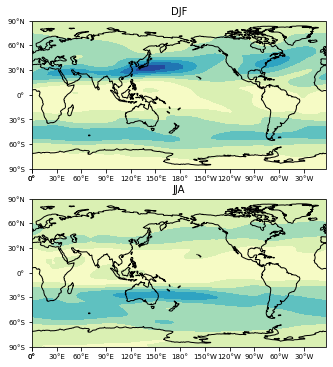

In [30]:
if maptype=="cartopy" :
    fig, ax = plt.subplots(2,1, figsize=(7,6), subplot_kw = {"projection" : ccrs.PlateCarree(central_longitude = 180)})
    for i in range(2):
        ax[i].set_xticks(np.arange(0,360+30,30), crs = ccrs.PlateCarree())
        ax[i].set_yticks(np.arange(-90,90+30,30), crs = ccrs.PlateCarree())
        #ccrs = 에 관한 내용은 
        #https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html 참조
        ax[i].xaxis.set_major_formatter(LongitudeFormatter())
        ax[i].yaxis.set_major_formatter(LatitudeFormatter())
        ax[i].tick_params(axis='both', labelsize=7)
        ax[i].coastlines()
        
        image = ax[i].contourf(lon2d, lat2d, wspd[i,:,:], contour_levels, cmap = 'YlGnBu', extend = 'both',
                              transform = ccrs.PlateCarree())
        #Determines the contourf-coloring of values that are outside the levels range.
        #If 'neither', values outside the levels range are not colored. I
        #f 'min', 'max' or 'both', color the values below, above or below and above the levels range.
        
        #transform 해야하는 이유 : 
        #https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html 
        #참조
        
        ax[i].set_title(titles[i], fontsize=10)